#Bank Customer Churn Prediction

#Data Exploration part

This module consists of data pre-processing for the project.

Raw Data for project is already collected (Source: Kaggle)

In [ ]:

#import libraries
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import plotly.express as px

import plotly.graph_objects as go

from matplotlib.ticker import PercentFormatter

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.neural_network import MLPClassifier

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier

from sklearn import svm

from sklearn.preprocessing import LabelEncoder

from sklearn import preprocessing

from sklearn.metrics import roc_curve, roc_auc_score,accuracy_score,make_scorer

from sklearn.metrics import recall_score,classification_report,precision_score,confusion_matrix


In [ ]:
# loading dataset to IDE as DataFrame

data = pd.read_csv('/content/(Raw_Data)Bank Customer Churn Prediction.csv')

data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,NaN,1,YES,ACTIVE,101348.88,YES
1,15647311,608,Spain,Female,41,1,8387.86,1,NO,ACTIVE,112542.58,NO
2,15619304,502,France,Female,42,8,15966.80,3,YES,NON_ACTIVE,113931.57,YES
3,15701354,699,France,Female,39,1,NaN,2,NO,NON_ACTIVE,93826.63,NO
4,15737888,850,Spain,Female,43,2,12551.82,1,YES,ACTIVE,79084.10,NO


In [ ]:
#Information about dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           6383 non-null   float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  object 
 9   active_member     10000 non-null  object 
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 937.6+ KB


In [ ]:
#removing unnecessary attributes

data = data.drop('customer_id',axis=1)

In [ ]:
#Checking for duplicated values

data.duplicated().sum()

0

In [ ]:
#checking for null(empty entry) values

data.isnull().sum()

credit_score           0
country                0
gender                 0
age                    0
tenure                 0
balance             3617
products_number        0
credit_card            0
active_member          0
estimated_salary       0
churn                  0
dtype: int64

In [ ]:
data['balance']

0            NaN
1        8387.86
2       15966.80
3            NaN
4       12551.82
          ...   
9995         NaN
9996    57369.61
9997         NaN
9998     7575.31
9999    13142.79
Name: balance, Length: 10000, dtype: float64

In [ ]:
#Replacing null values with average(mean) value of the attribute



data['balance'].fillna(data['balance'].mean(), inplace=True)

data

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,75345.698833,1,YES,ACTIVE,101348.88,YES
1,608,Spain,Female,41,1,8387.860000,1,NO,ACTIVE,112542.58,NO
2,502,France,Female,42,8,15966.800000,3,YES,NON_ACTIVE,113931.57,YES
3,699,France,Female,39,1,75345.698833,2,NO,NON_ACTIVE,93826.63,NO
4,850,Spain,Female,43,2,12551.820000,1,YES,ACTIVE,79084.10,NO
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,75345.698833,2,YES,NON_ACTIVE,96270.64,NO
9996,516,France,Male,35,10,57369.610000,1,YES,ACTIVE,101699.77,NO
9997,709,France,Female,36,7,75345.698833,1,NO,ACTIVE,42085.58,YES
9998,772,Germany,Male,42,3,7575.310000,2,YES,NON_ACTIVE,92888.52,YES


In [ ]:
# changing binary variables of attributes 'credit_card','active_member' and 'churn' to 0 & 1 for easy mathematical purpose

data['credit_card'] = data['credit_card'].replace(to_replace = ['YES','NO'],value = ['1','0'])

data['active_member'] = data['active_member'].replace(to_replace = ['ACTIVE','NON_ACTIVE'],value = ['1','0'])

data['churn'] = data['churn'].replace(to_replace = ['YES','NO'],value = ['1','0'])

In [ ]:
data

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,75345.698833,1,1,1,101348.88,1
1,608,Spain,Female,41,1,8387.860000,1,0,1,112542.58,0
2,502,France,Female,42,8,15966.800000,3,1,0,113931.57,1
3,699,France,Female,39,1,75345.698833,2,0,0,93826.63,0
4,850,Spain,Female,43,2,12551.820000,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,75345.698833,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.610000,1,1,1,101699.77,0
9997,709,France,Female,36,7,75345.698833,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,7575.310000,2,1,0,92888.52,1


In [ ]:
data.head(10)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,75345.698833,1,1,1,101348.88,1
1,608,Spain,Female,41,1,8387.860000,1,0,1,112542.58,0
2,502,France,Female,42,8,15966.800000,3,1,0,113931.57,1
3,699,France,Female,39,1,75345.698833,2,0,0,93826.63,0
4,850,Spain,Female,43,2,12551.820000,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.780000,2,1,0,149756.71,1
6,822,France,Male,50,7,75345.698833,2,1,1,10062.80,0
7,376,Germany,Female,29,4,11546.740000,4,1,0,119346.88,1
8,501,France,Male,44,4,14251.700000,2,0,1,74940.50,0
9,684,France,Male,27,2,13463.880000,1,1,1,71725.73,0


In [ ]:
data.tail(10)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9990,714,Germany,Male,33,3,3516.600000,1,1,0,53667.08,0
9991,597,France,Female,53,4,88381.210000,1,1,0,69384.71,1
9992,726,Spain,Male,36,2,75345.698833,1,1,0,195192.40,0
9993,644,France,Male,28,7,1556.410000,1,1,0,29179.52,0
9994,800,France,Female,29,2,75345.698833,2,0,0,167773.55,0
9995,771,France,Male,39,5,75345.698833,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.610000,1,1,1,101699.77,0
9997,709,France,Female,36,7,75345.698833,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,7575.310000,2,1,0,92888.52,1
9999,792,France,Female,28,4,13142.790000,1,1,0,38190.78,0


In [ ]:
#Downloading pre-processed dataframe as csv

data.to_csv('Data_exploration.csv', header=True, index=False)

files.download('Data_exploration.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Feature Engineering


In this portion we apply feature engineering concept on our explored and cleaned dataset.

In thi we develop new attribute using existing attributes

In [ ]:
#loading csv file into dataframe using pandads

feature_data = pd.read_csv('/content/(Data_exploration)Bank Customer Churn Prediction.csv')

feature_data

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,75345.698833,1,1,1,101348.88,1
1,608,Spain,Female,41,1,8387.860000,1,0,1,112542.58,0
2,502,France,Female,42,8,15966.800000,3,1,0,113931.57,1
3,699,France,Female,39,1,75345.698833,2,0,0,93826.63,0
4,850,Spain,Female,43,2,12551.820000,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,75345.698833,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.610000,1,1,1,101699.77,0
9997,709,France,Female,36,7,75345.698833,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,7575.310000,2,1,0,92888.52,1


In [ ]:
# We use two attributes 'credit_card' & 'churn' to develop a new feature named 'cc_with_churn'.

feature_data['cc_with_churn'] = np.where((feature_data['credit_card'] == 1) & (feature_data['churn'] == 1),1,0)

feature_data

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,cc_with_churn
0,619,France,Female,42,2,75345.698833,1,1,1,101348.88,1,1
1,608,Spain,Female,41,1,8387.860000,1,0,1,112542.58,0,0
2,502,France,Female,42,8,15966.800000,3,1,0,113931.57,1,1
3,699,France,Female,39,1,75345.698833,2,0,0,93826.63,0,0
4,850,Spain,Female,43,2,12551.820000,1,1,1,79084.10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,75345.698833,2,1,0,96270.64,0,0
9996,516,France,Male,35,10,57369.610000,1,1,1,101699.77,0,0
9997,709,France,Female,36,7,75345.698833,1,0,1,42085.58,1,0
9998,772,Germany,Male,42,3,7575.310000,2,1,0,92888.52,1,1


In [ ]:
# We use two attributes 'active_member' & 'churn' to develop a new feature named 'am_with_churn'.

feature_data['am_with_churn'] = np.where((feature_data['active_member'] == 1) & (feature_data['churn'] == 1),1,0)

feature_data

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,cc_with_churn,am_with_churn
0,619,France,Female,42,2,75345.698833,1,1,1,101348.88,1,1,1
1,608,Spain,Female,41,1,8387.860000,1,0,1,112542.58,0,0,0
2,502,France,Female,42,8,15966.800000,3,1,0,113931.57,1,1,0
3,699,France,Female,39,1,75345.698833,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,12551.820000,1,1,1,79084.10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,75345.698833,2,1,0,96270.64,0,0,0
9996,516,France,Male,35,10,57369.610000,1,1,1,101699.77,0,0,0
9997,709,France,Female,36,7,75345.698833,1,0,1,42085.58,1,0,1
9998,772,Germany,Male,42,3,7575.310000,2,1,0,92888.52,1,1,0


In [ ]:
feature_data

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,cc_with_churn,am_with_churn
0,619,France,Female,42,2,75345.698833,1,1,1,101348.88,1,1,1
1,608,Spain,Female,41,1,8387.860000,1,0,1,112542.58,0,0,0
2,502,France,Female,42,8,15966.800000,3,1,0,113931.57,1,1,0
3,699,France,Female,39,1,75345.698833,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,12551.820000,1,1,1,79084.10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,75345.698833,2,1,0,96270.64,0,0,0
9996,516,France,Male,35,10,57369.610000,1,1,1,101699.77,0,0,0
9997,709,France,Female,36,7,75345.698833,1,0,1,42085.58,1,0,1
9998,772,Germany,Male,42,3,7575.310000,2,1,0,92888.52,1,1,0


In [ ]:
#Downloading Feature Engineering dataframe as csv

feature_data.to_csv('(Feature Engineering) Bank Customer Churn Prediction.csv', header=True, index=False)

files.download('(Feature Engineering) Bank Customer Churn Prediction.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Data Analysis & Visualization

In this portion we do some exploratory analysis on dataset for finding the patterns.

By using visualizations we try to find patterns.

In [ ]:
# loading feature engineering applied dataset

featured_data = pd.read_csv('/content/(Feature Engineering) Bank Customer Churn Prediction.csv')

featured_data

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,cc_with_churn,am_with_churn
0,619,France,Female,42,2,75345.698833,1,1,1,101348.88,1,1,1
1,608,Spain,Female,41,1,8387.860000,1,0,1,112542.58,0,0,0
2,502,France,Female,42,8,15966.800000,3,1,0,113931.57,1,1,0
3,699,France,Female,39,1,75345.698833,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,12551.820000,1,1,1,79084.10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,75345.698833,2,1,0,96270.64,0,0,0
9996,516,France,Male,35,10,57369.610000,1,1,1,101699.77,0,0,0
9997,709,France,Female,36,7,75345.698833,1,0,1,42085.58,1,0,1
9998,772,Germany,Male,42,3,7575.310000,2,1,0,92888.52,1,1,0


In [ ]:
# creating dummy dataset for analysis

dummy = featured_data

dummy.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,cc_with_churn,am_with_churn
0,619,France,Female,42,2,75345.698833,1,1,1,101348.88,1,1,1
1,608,Spain,Female,41,1,8387.860000,1,0,1,112542.58,0,0,0
2,502,France,Female,42,8,15966.800000,3,1,0,113931.57,1,1,0
3,699,France,Female,39,1,75345.698833,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,12551.820000,1,1,1,79084.10,0,0,0


#### Churn Distibution on different Perspectives

Churn: 2037
Retention: 7963


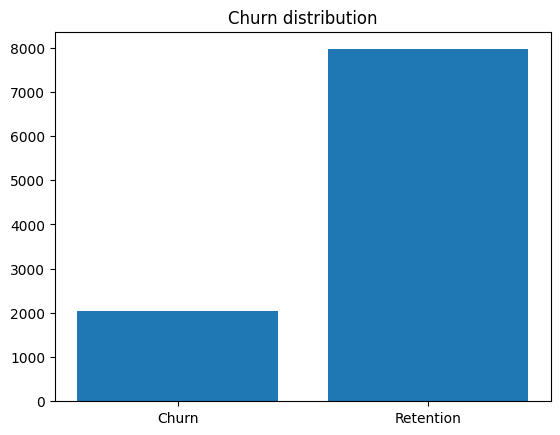

In [ ]:
# Anlayzing churn distribution

plt.bar(['Churn', 'Retention'], [dummy['churn'].sum(), dummy['churn'].shape[0]-dummy['churn'].sum().sum()])

plt.title('Churn distribution')

print("Churn:",dummy['churn'].sum())

print("Retention:",dummy['churn'].shape[0]-dummy['churn'].sum().sum())

Churn: 1424
Retention: 8576


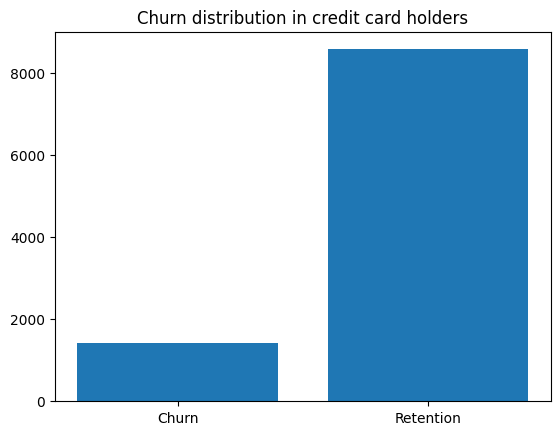

In [ ]:
# Anlayzing churn distribution for credit_card holders

plt.bar(['Churn', 'Retention'], [dummy['cc_with_churn'].sum(), dummy['cc_with_churn'].shape[0]-dummy['cc_with_churn'].sum().sum()])

plt.title('Churn distribution in credit card holders')

print("Churn:",dummy['cc_with_churn'].sum())

print("Retention:",dummy['cc_with_churn'].shape[0]-dummy['cc_with_churn'].sum().sum())

Churn: 735
Retention: 9265


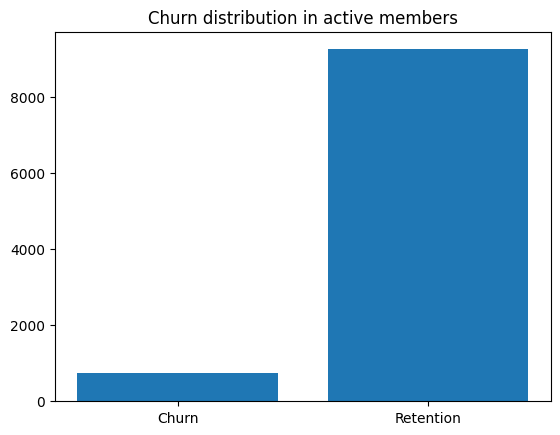

In [ ]:
# Anlayzing churn distribution for Active Members

plt.bar(['Churn', 'Retention'], [dummy['am_with_churn'].sum(), dummy['am_with_churn'].shape[0]-dummy['am_with_churn'].sum().sum()])

plt.title('Churn distribution in active members')

print("Churn:",dummy['am_with_churn'].sum())

print("Retention:",dummy['am_with_churn'].shape[0]-dummy['am_with_churn'].sum().sum())

In [ ]:
# Creating new attribute for those who are cc holders and active members and churn

dummy['cc_am_with_churn'] = np.where((dummy['cc_with_churn'] == 1) & (dummy['am_with_churn'] == 1), 1, 0)

Churn: 482
Retention: 9518


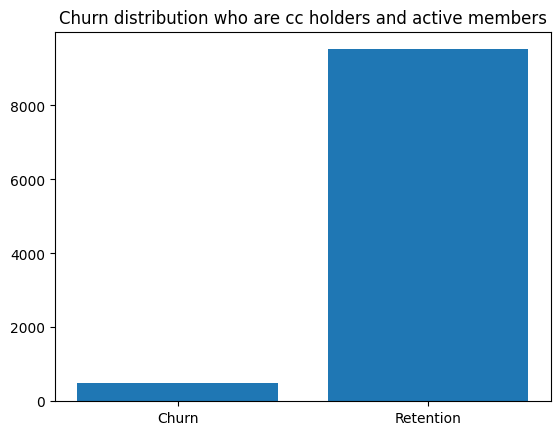

In [ ]:
# Anlayzing churn distribution for cc holders & Active Members

plt.bar(['Churn', 'Retention'], [dummy['cc_am_with_churn'].sum(), dummy['cc_am_with_churn'].shape[0]-dummy['cc_am_with_churn'].sum().sum()])

plt.title('Churn distribution who are cc holders and active members')

print("Churn:",dummy['cc_am_with_churn'].sum())

print("Retention:",dummy['cc_am_with_churn'].shape[0]-dummy['cc_am_with_churn'].sum().sum())

#### Male-Female Distribution on different perspectives

In [ ]:
# Making gender attribute as integer

dummy['gender'] = dummy['gender'].replace(to_replace = ['Male','Female'],value = ['1','0']).astype(int)

Male: 5457
Female: 4543


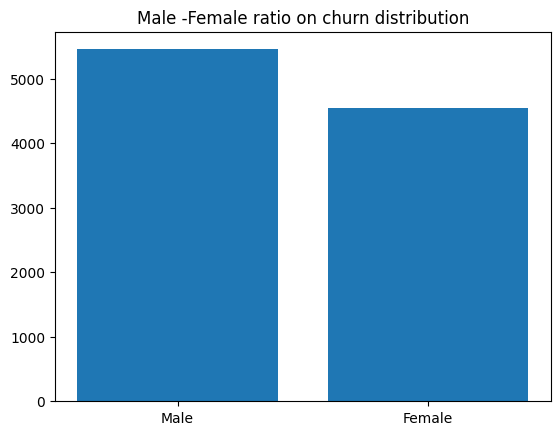

In [ ]:
# Male - Female Distribution

plt.bar(['Male', 'Female'], [dummy['gender'].sum(), dummy['gender'].shape[0]-dummy['gender'].sum().sum()])

plt.title('Male -Female ratio on churn distribution')

print("Male:",dummy['gender'].sum())

print("Female:",dummy['gender'].shape[0]-dummy['gender'].sum().sum())

Male: 898
Female: 1139


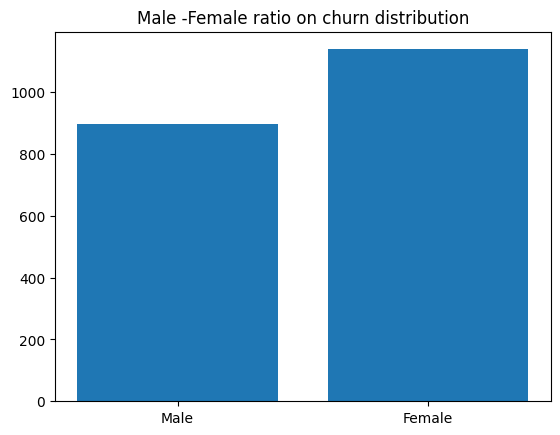

In [ ]:
# Male - Female distribution who churn

# Creating dataframe which only shows who are churn
dummy1 = dummy.loc[dummy['churn'] == 1]

# Visualizing Male - Female Distibution who churn
plt.bar(['Male', 'Female'], [dummy1['gender'].sum(), dummy1['gender'].shape[0]-dummy1['gender'].sum().sum()])

plt.title('Male -Female ratio on churn distribution')

print("Male:",dummy1['gender'].sum())

print("Female:",dummy1['gender'].shape[0]-dummy1['gender'].sum().sum())


Male: 629
Female: 795


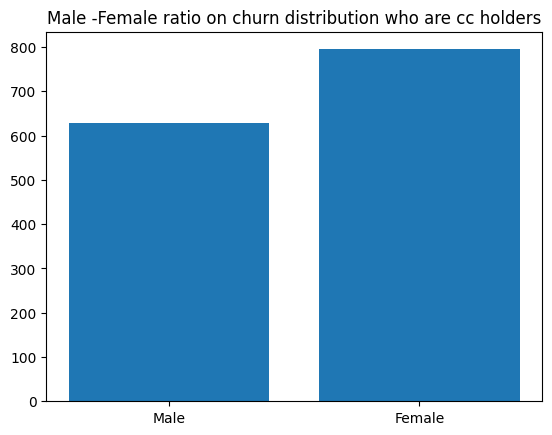

In [ ]:
# Male - Female distribution who churn and cc holders

# Creating dataframe which only shows who are churn
dummy2 = dummy.loc[dummy['cc_with_churn'] == 1]

# Visualizing Male - Female Distibution who churn
plt.bar(['Male', 'Female'], [dummy2['gender'].sum(), dummy2['gender'].shape[0]-dummy2['gender'].sum().sum()])

plt.title('Male -Female ratio on churn distribution who are cc holders')

print("Male:",dummy2['gender'].sum())

print("Female:",dummy2['gender'].shape[0]-dummy2['gender'].sum().sum())


Male: 321
Female: 414


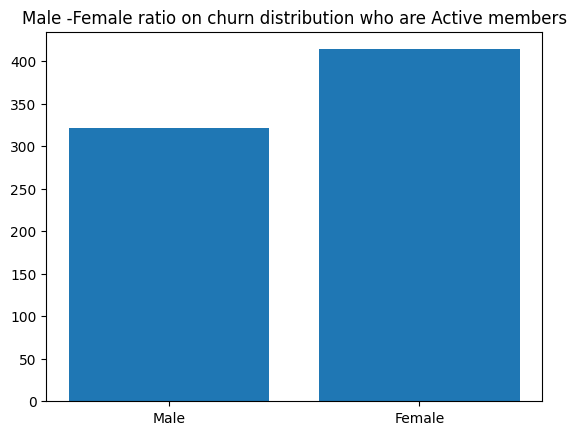

In [ ]:
# Male - Female distribution who churn and Active Members

# Creating dataframe which only shows who are churn
dummy3 = dummy.loc[dummy['am_with_churn'] == 1]

# Visualizing Male - Female Distibution who churn
plt.bar(['Male', 'Female'], [dummy3['gender'].sum(), dummy3['gender'].shape[0]-dummy3['gender'].sum().sum()])

plt.title('Male -Female ratio on churn distribution who are Active members')

print("Male:",dummy3['gender'].sum())

print("Female:",dummy3['gender'].shape[0]-dummy3['gender'].sum().sum())


Male: 210
Female: 272


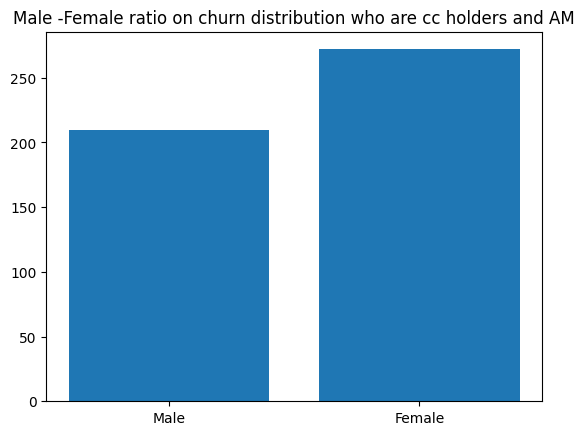

In [ ]:
# Male - Female distribution who churn and (Active Members & cc holders)

# Creating dataframe which only shows who are churn
dummy4 = dummy.loc[dummy['cc_am_with_churn'] == 1]

# Visualizing Male - Female Distibution who churn
plt.bar(['Male', 'Female'], [dummy4['gender'].sum(), dummy4['gender'].shape[0]-dummy4['gender'].sum().sum()])

plt.title('Male -Female ratio on churn distribution who are cc holders and AM')

print("Male:",dummy4['gender'].sum())

print("Female:",dummy4['gender'].shape[0]-dummy4['gender'].sum().sum())


##### Findings : Female customers are more likely to churn that's why banks have to work on more towards women engagement programs

#### Churn distribution in different Countries

<Axes: title={'center': 'Countries'}>

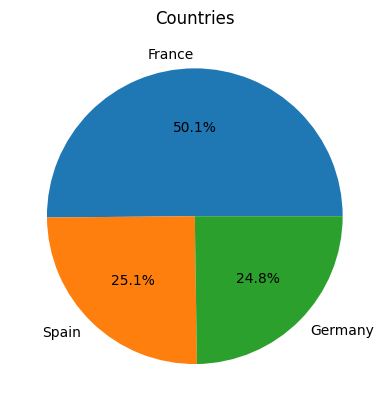

In [ ]:
# creating pie chart for customer distribution in different Countries

pd.crosstab(index=dummy.country,columns='count',normalize=True).plot(
    kind='pie',autopct='%.1f%%',y='count',
    labels=dummy.country.unique(),
    ylabel='',title='Countries',legend=False)

In [ ]:
# Calculating churn ratio for each country

by_country = dummy.groupby(['country'])['churn'].value_counts(normalize=True).to_frame().rename(columns={'churn': 'ratio'}).reset_index().sort_values('country')

by_country


,country,churn,ratio
0,France,0,0.838452
1,France,1,0.161548
2,Germany,0,0.675568
3,Germany,1,0.324432
4,Spain,0,0.833266
5,Spain,1,0.166734


[Text(0.5, 1.0, 'Churned Probability with country')]

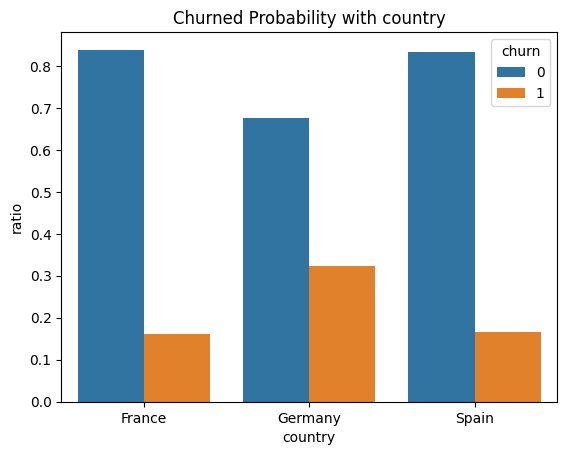

In [ ]:
# Visualizing churn ratio for each country

sns.barplot(x='country',y='ratio', hue='churn', data=by_country).set(title = 'Churned Probability with country')

In [ ]:
# Calculating churn ratio for who are cc holders each country

by_country_cc = dummy.groupby(['country'])['cc_with_churn'].value_counts(normalize=True).to_frame().rename(columns={'cc_with_churn': 'ratio'}).reset_index().sort_values('country')

by_country_cc


,country,cc_with_churn,ratio
0,France,0,0.886518
1,France,1,0.113482
2,Germany,0,0.770028
3,Germany,1,0.229972
4,Spain,0,0.887767
5,Spain,1,0.112233


[Text(0.5, 1.0, 'Churned Probability with country aho are cc holder')]

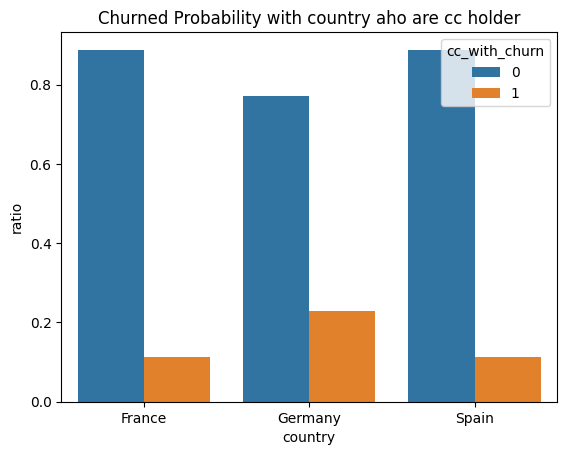

In [ ]:
# Visualizing churn ratio for who are cc holder each country

sns.barplot(x='country',y='ratio', hue='cc_with_churn', data=by_country_cc).set(title = 'Churned Probability with country aho are cc holder')

In [ ]:
# Calculating churn ratio for who are Active members each country

by_country_am = dummy.groupby(['country'])['am_with_churn'].value_counts(normalize=True).to_frame().rename(columns={'am_with_churn': 'ratio'}).reset_index().sort_values('country')

by_country_am


,country,am_with_churn,ratio
0,France,0,0.940566
1,France,1,0.059434
2,Germany,0,0.882025
3,Germany,1,0.117975
4,Spain,0,0.943076
5,Spain,1,0.056924


[Text(0.5, 1.0, 'Churned Probability with country aho are active Members')]

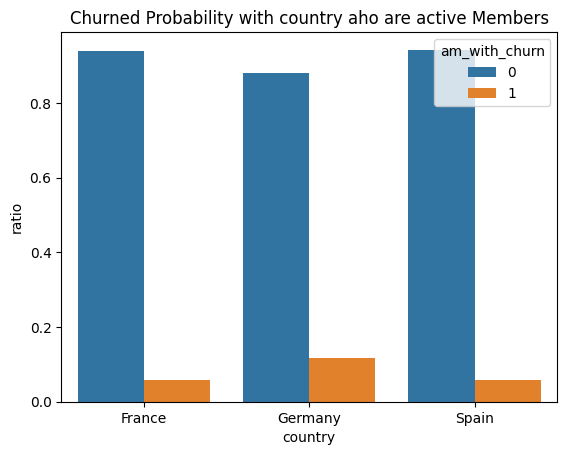

In [ ]:
# Visualizing churn ratio for who are Active Members each country

sns.barplot(x='country',y='ratio', hue='am_with_churn', data=by_country_am).set(title = 'Churned Probability with country aho are active Members')

In [ ]:
# Calculating churn ratio for who are Active members & cc holders each country

by_country_cc_am = dummy.groupby(['country'])['cc_am_with_churn'].value_counts(normalize=True).to_frame().rename(columns={'cc_am_with_churn': 'ratio'}).reset_index().sort_values('country')

by_country_cc_am


,country,cc_am_with_churn,ratio
0,France,0,0.961109
1,France,1,0.038891
2,Germany,0,0.920686
3,Germany,1,0.079314
4,Spain,0,0.964473
5,Spain,1,0.035527


[Text(0.5, 1.0, 'Churned Probability with country aho are active Members & cc holders')]

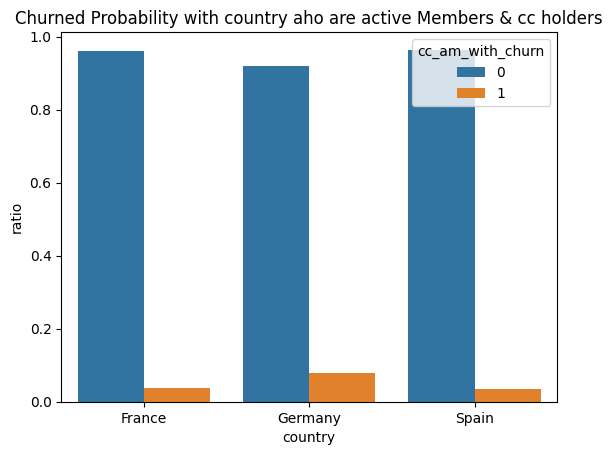

In [ ]:
# Visualizing churn ratio for who are Active Members each country

sns.barplot(x='country',y='ratio', hue='cc_am_with_churn', data=by_country_cc_am).set(title = 'Churned Probability with country aho are active Members & cc holders')

##### Findings : Germany has highest churn rate

In germany churn rate for cc holders,active members and both is respectively 0.23,0.12,0.08

Whereas France and Spain has half of churn rate than Germany

#### By gender and country wise churn ratio on differnt perspectives

In [ ]:
# Calculating churn ratio on gender & country wise

by_gender_country = dummy.groupby(['country', 'gender'])['churn'].value_counts(normalize=True).to_frame().rename(columns={'churn': 'ratio'}).reset_index().sort_values('country')

by_gender_country


,country,gender,churn,ratio
0,France,0,0,0.796550
1,France,0,1,0.203450
2,France,1,0,0.872866
3,France,1,1,0.127134
4,Germany,0,0,0.624476
5,Germany,0,1,0.375524
6,Germany,1,0,0.721884
7,Germany,1,1,0.278116
8,Spain,0,0,0.787879
9,Spain,0,1,0.212121


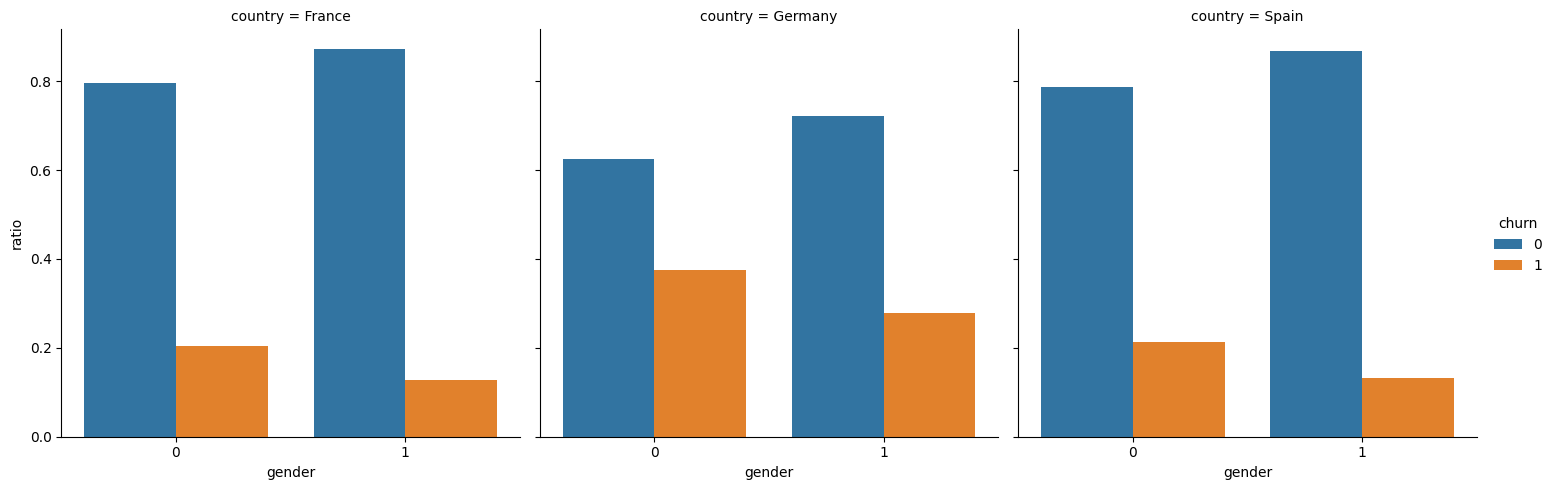

In [ ]:
# Visualizing churn ratio on gender & country wise

sns.catplot(x='gender',y='ratio', hue='churn', col='country', kind='bar', data=by_gender_country)

In [ ]:
# Calculating churn ratio on gender & country wise who are cc holders

by_gender_country_cc = dummy.groupby(['country', 'gender'])['cc_with_churn'].value_counts(normalize=True).to_frame().rename(columns={'cc_with_churn': 'ratio'}).reset_index().sort_values('country')

by_gender_country_cc


,country,gender,cc_with_churn,ratio
0,France,0,0,0.858027
1,France,0,1,0.141973
2,France,1,0,0.909916
3,France,1,1,0.090084
4,Germany,0,0,0.734283
5,Germany,0,1,0.265717
6,Germany,1,0,0.802432
7,Germany,1,1,0.197568
8,Spain,0,0,0.855831
9,Spain,0,1,0.144169


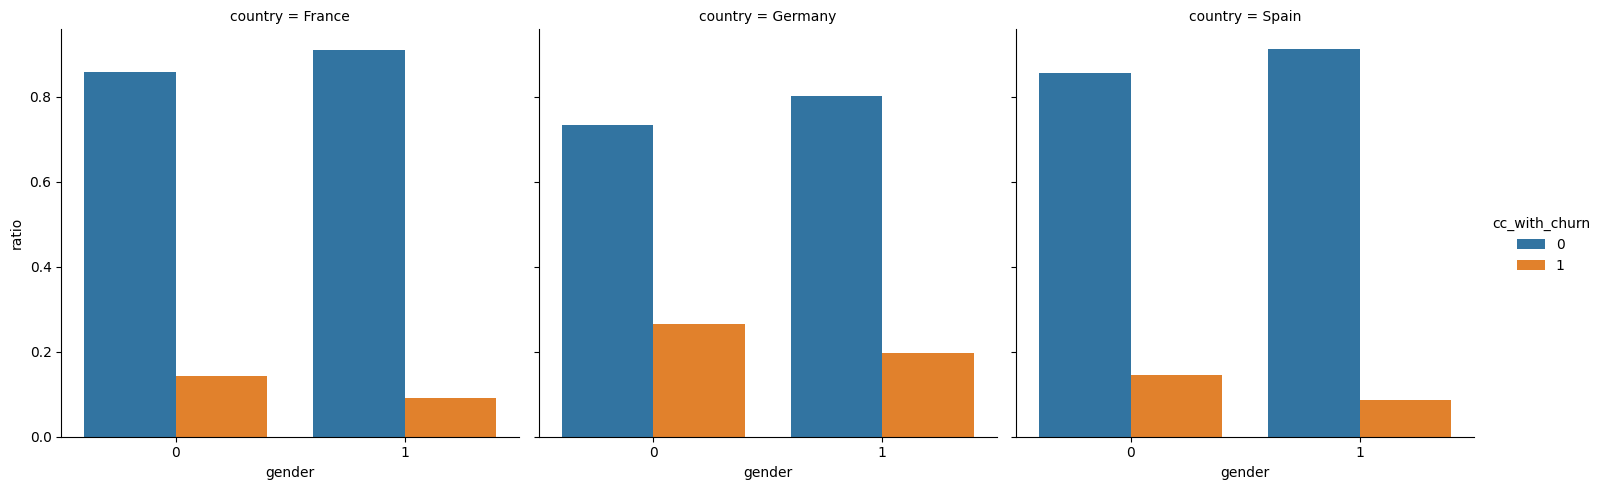

In [ ]:
# Visualizing churn ratio on gender & country wise who are cc holders

sns.catplot(x='gender',y='ratio', hue='cc_with_churn', col='country', kind='bar', data=by_gender_country_cc)

In [ ]:
# Calculating churn ratio on gender & country wise who are Active Members
by_gender_country_am = dummy.groupby(['country', 'gender'])['am_with_churn'].value_counts(normalize=True).to_frame().rename(columns={'am_with_churn': 'ratio'}).reset_index().sort_values('country')

by_gender_country_am


,country,gender,am_with_churn,ratio
0,France,0,0,0.923927
1,France,0,1,0.076073
2,France,1,0,0.954232
3,France,1,1,0.045768
4,Germany,0,0,0.861693
5,Germany,0,1,0.138307
6,Germany,1,0,0.900456
7,Germany,1,1,0.099544
8,Spain,0,0,0.929293
9,Spain,0,1,0.070707


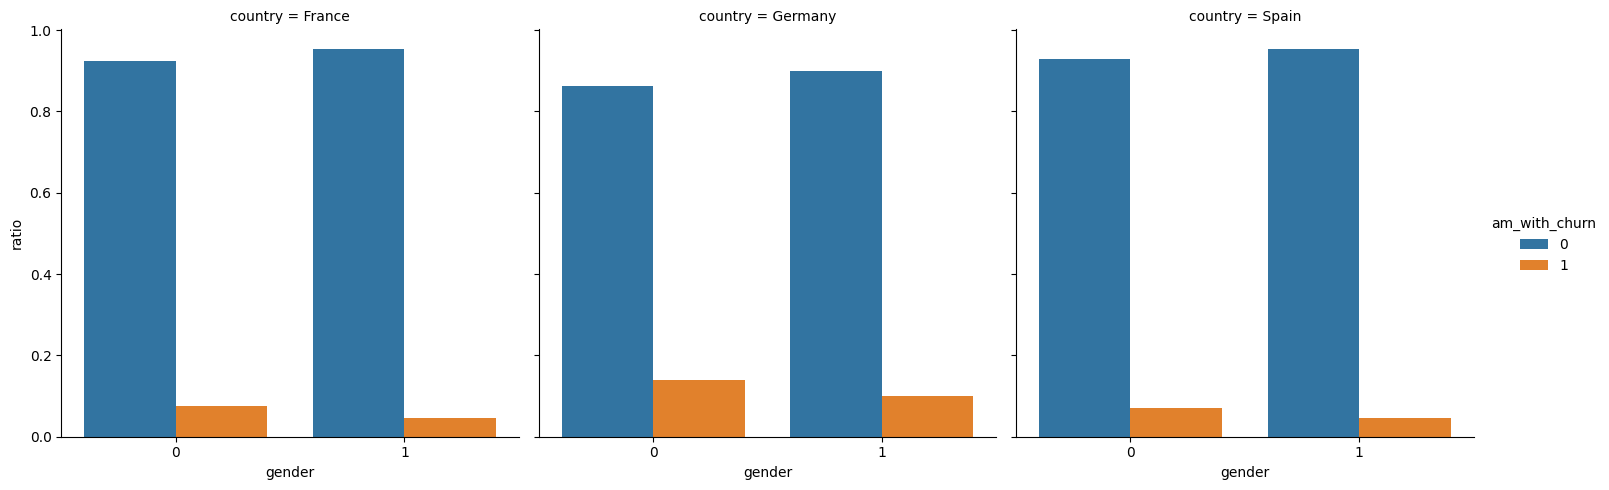

In [ ]:
# Visualizing churn ratio on gender & country wise who are Active Members

sns.catplot(x='gender',y='ratio', hue='am_with_churn', col='country', kind='bar', data=by_gender_country_am)

In [ ]:
# Calculating churn ratio on gender & country wise who are Active Members & cc holders

by_gender_country_cc_am = dummy.groupby(['country', 'gender'])['cc_am_with_churn'].value_counts(normalize=True).to_frame().rename(columns={'cc_am_with_churn': 'ratio'}).reset_index().sort_values('country')

by_gender_country_cc_am


,country,gender,cc_am_with_churn,ratio
0,France,0,0,0.950022
1,France,0,1,0.049978
2,France,1,0,0.970214
3,France,1,1,0.029786
4,Germany,0,0,0.906119
5,Germany,0,1,0.093881
6,Germany,1,0,0.933891
7,Germany,1,1,0.066109
8,Spain,0,0,0.956841
9,Spain,0,1,0.043159


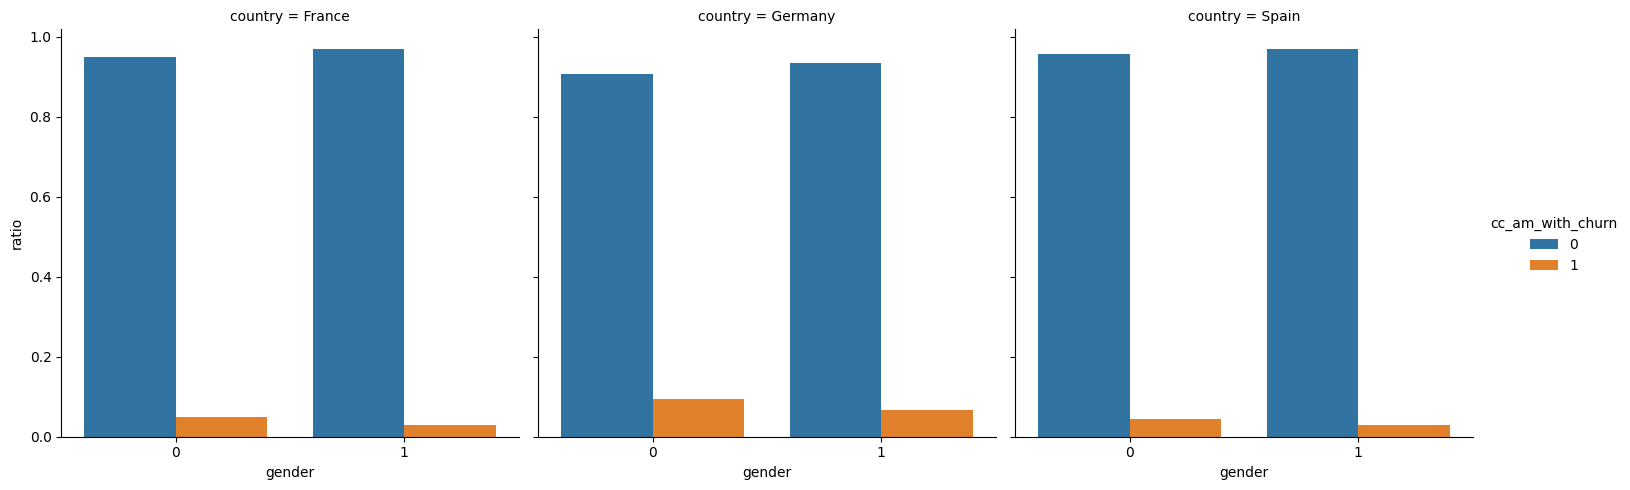

In [ ]:
# Visualizing churn ratio on gender & country wise who are Active Members & cc holders

sns.catplot(x='gender',y='ratio', hue='cc_am_with_churn', col='country', kind='bar', data=by_gender_country_cc_am)

#### Using age for churn distribution

In [ ]:
# Calculating churn ratio with age

by_age = dummy.groupby(['age'])['churn'].value_counts(normalize=True).to_frame().rename(columns={'churn': 'ratio'}).reset_index().sort_values('age')

by_age


,age,churn,ratio
0,18,0,0.909091
1,18,1,0.090909
2,19,0,0.962963
3,19,1,0.037037
4,20,0,0.950000
...,...,...,...
123,84,0,0.500000
124,84,1,0.500000
125,85,0,1.000000
126,88,0,1.000000


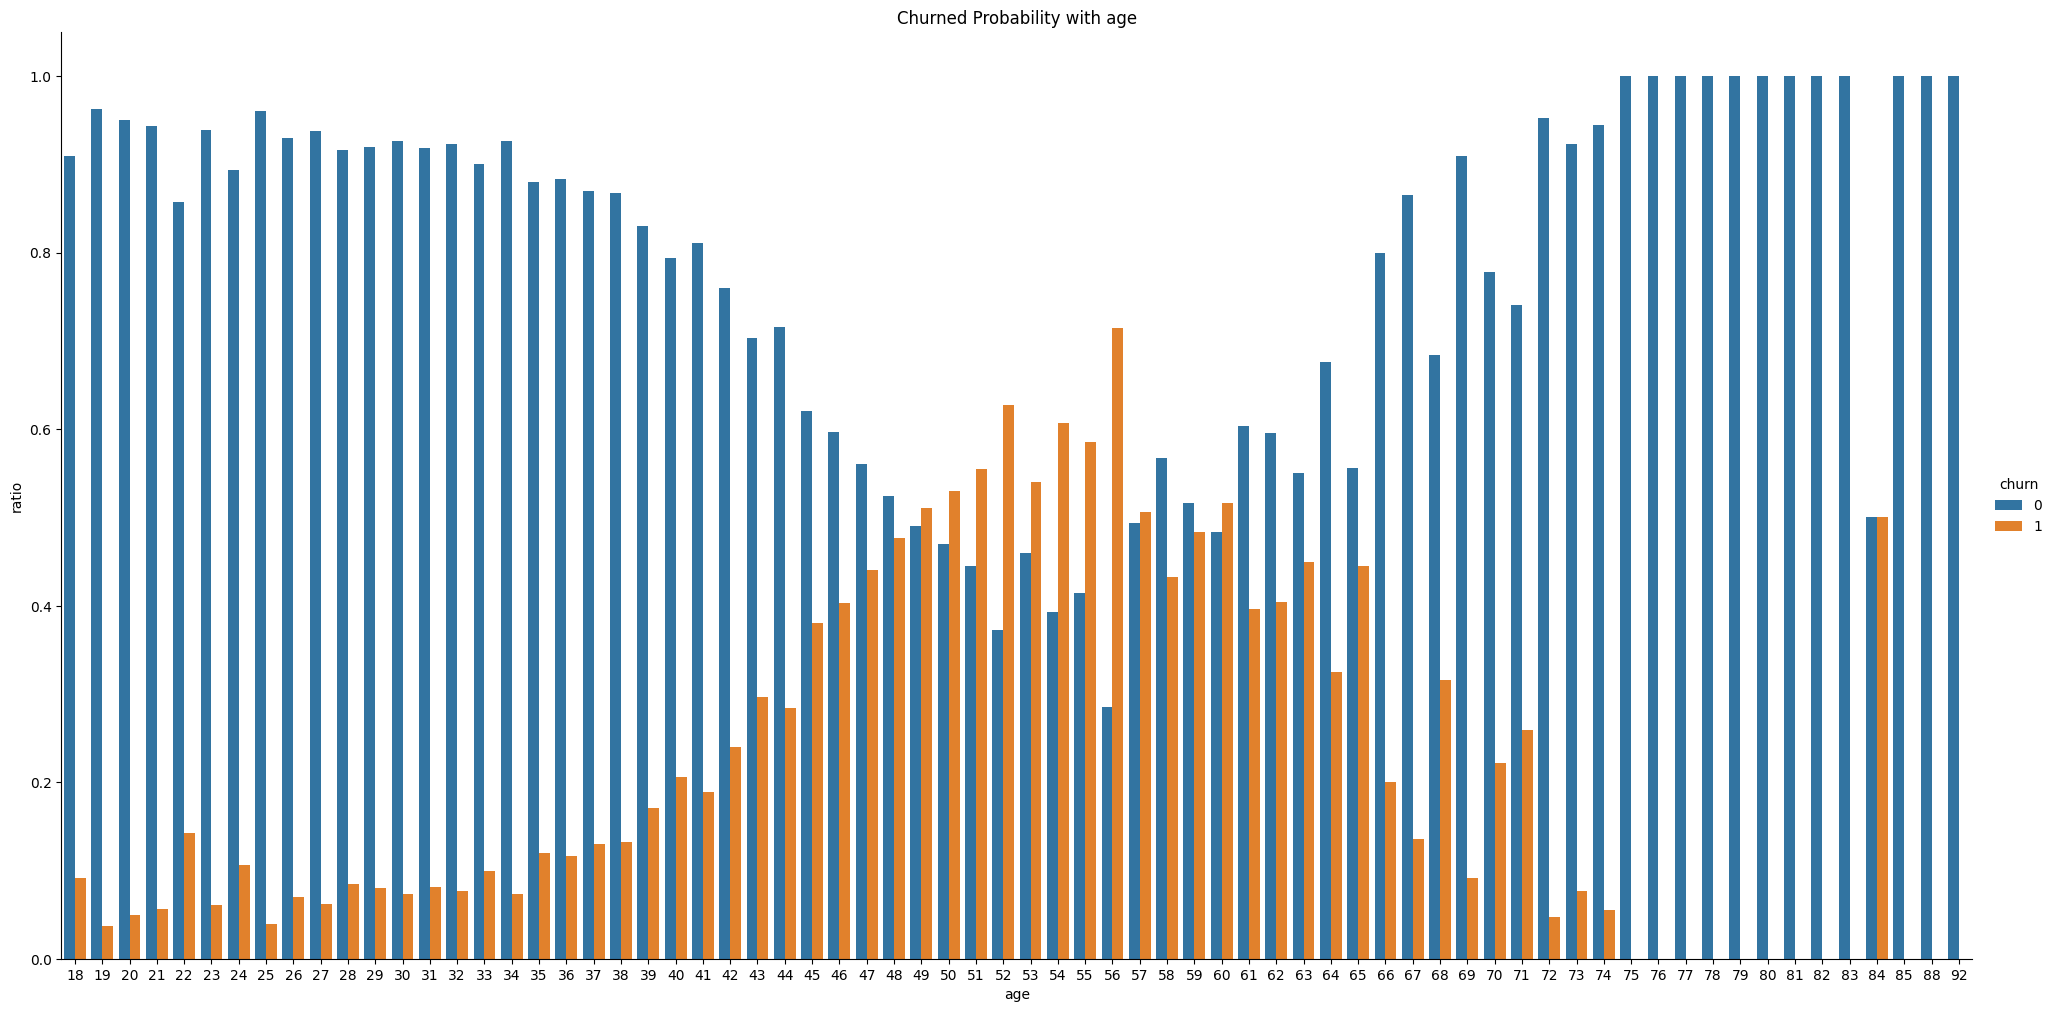

In [ ]:
# Visualizing churn ratio with age

sns.catplot(x='age',y='ratio', hue='churn',  kind='bar', data=by_age,height=10,aspect=2).set(title = 'Churned Probability with age')

In [ ]:
# Calculating churn ratio with age who are cc holders

by_age_cc = dummy.groupby(['age'])['cc_with_churn'].value_counts(normalize=True).to_frame().rename(columns={'cc_with_churn': 'ratio'}).reset_index().sort_values('age')

by_age_cc


,age,cc_with_churn,ratio
0,18,0,0.954545
1,18,1,0.045455
2,19,0,0.962963
3,19,1,0.037037
4,20,0,1.000000
...,...,...,...
119,83,0,1.000000
120,84,0,1.000000
121,85,0,1.000000
122,88,0,1.000000


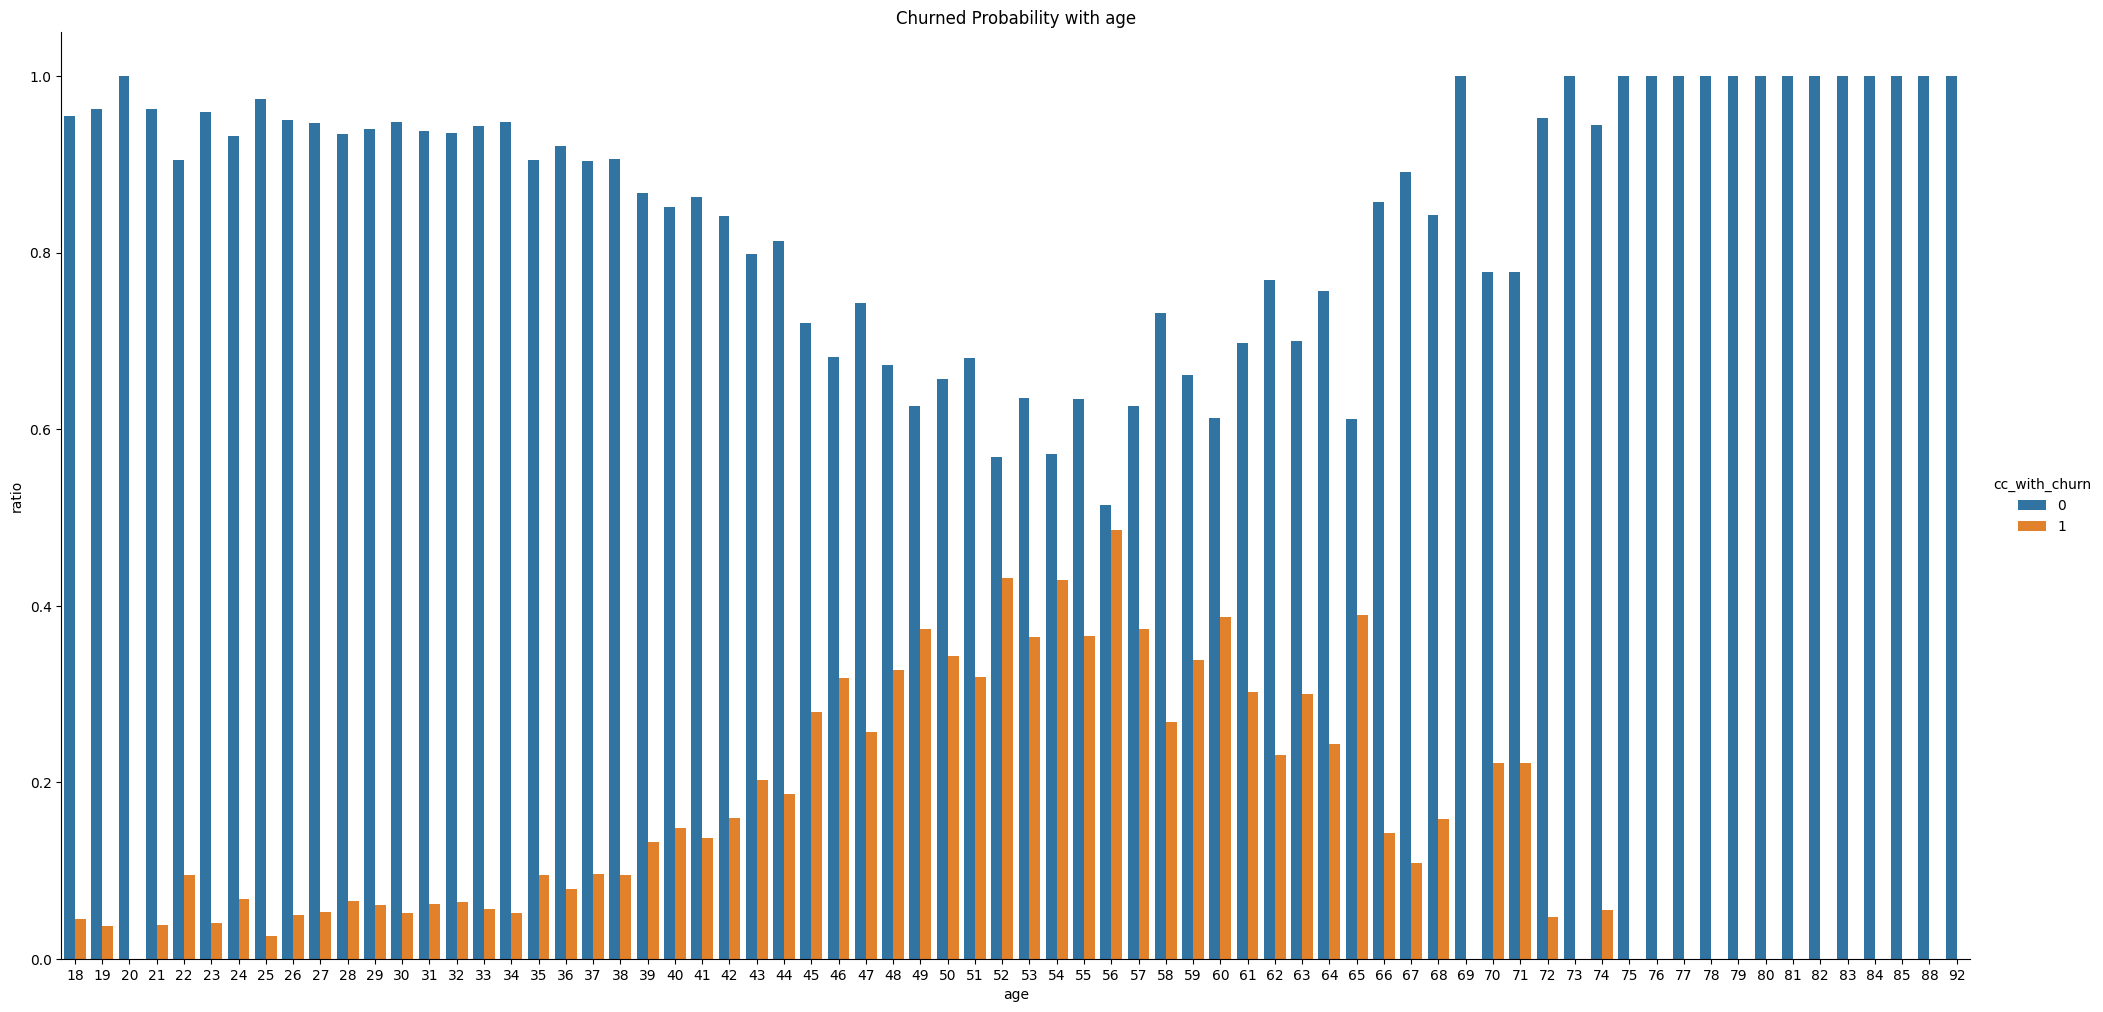

In [ ]:
# Visualizing churn ratio with age who are cc holders

sns.catplot(x='age',y='ratio', hue='cc_with_churn',  kind='bar', data=by_age_cc,height=10,aspect=2).set(title = 'Churned Probability with age')

#####Findings :


Most people between the ages of 49 and 57 would like to churn.

#### Using balance for churn prediction

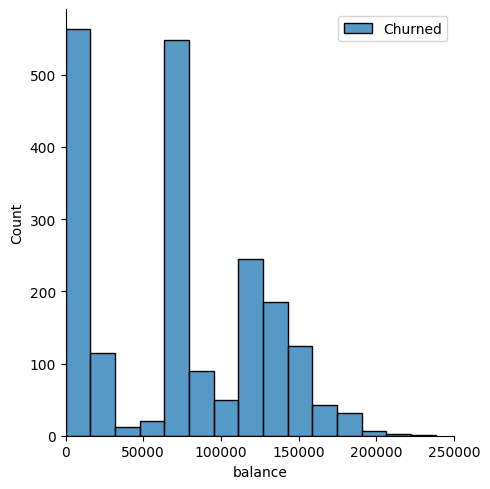

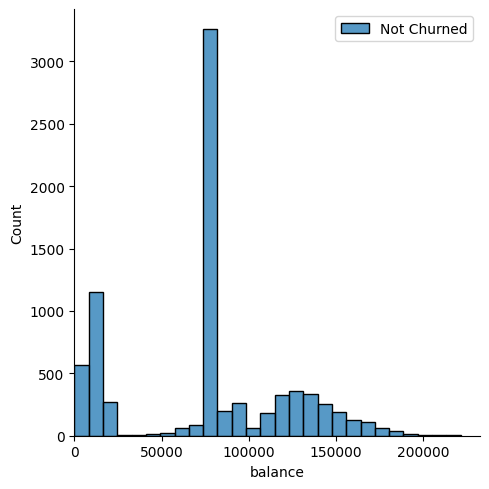

In [ ]:
# balance vs churn

sns.displot(dummy[(dummy['churn'] == 1)]['balance'], label='Churned').set(xlim=(0))
plt.legend(loc= 'upper right')
sns.displot(dummy[(dummy['churn'] == 0)]['balance'], label='Not Churned').set(xlim=(0))
plt.legend(loc= 'upper right')
plt.show()

#### Tenure vs churn

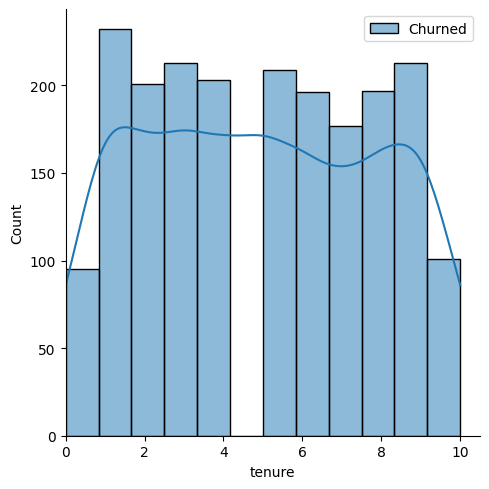

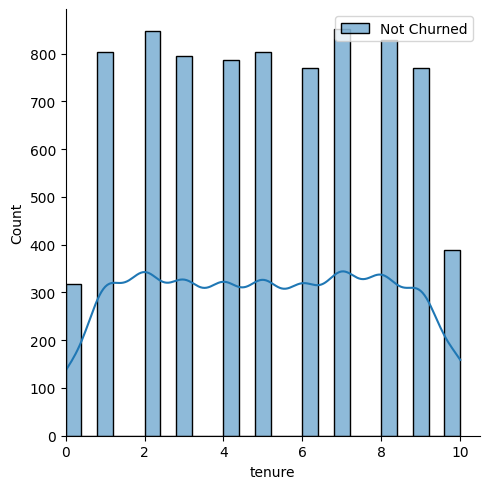

In [ ]:
# Tenure vs churn

sns.displot(dummy[dummy['churn'] == 1]['tenure'], label='Churned', kde=True).set(xlim=(0))
plt.legend(loc= 'upper right')
sns.displot(dummy[dummy['churn'] == 0]['tenure'], label='Not Churned', kde=True).set(xlim=(0))
plt.legend(loc= 'upper right')
plt.show()

#### Product number vs churn

    products_number  country  churn     ratio
0                 1   France      0  0.775656
1                 1   France      1  0.224344
2                 1  Germany      0  0.571534
3                 1  Germany      1  0.428466
4                 1    Spain      0  0.781327
5                 1    Spain      1  0.218673
11                2    Spain      1  0.073542
9                 2  Germany      1  0.121154
10                2    Spain      0  0.926458
7                 2   France      1  0.057034
6                 2   France      0  0.942966
8                 2  Germany      0  0.878846
12                3   France      1  0.788462
13                3   France      0  0.211538
14                3  Germany      1  0.895833
15                3  Germany      0  0.104167
16                3    Spain      1  0.787879
17                3    Spain      0  0.212121
19                4  Germany      1  1.000000
18                4   France      1  1.000000
20                4    Spain      

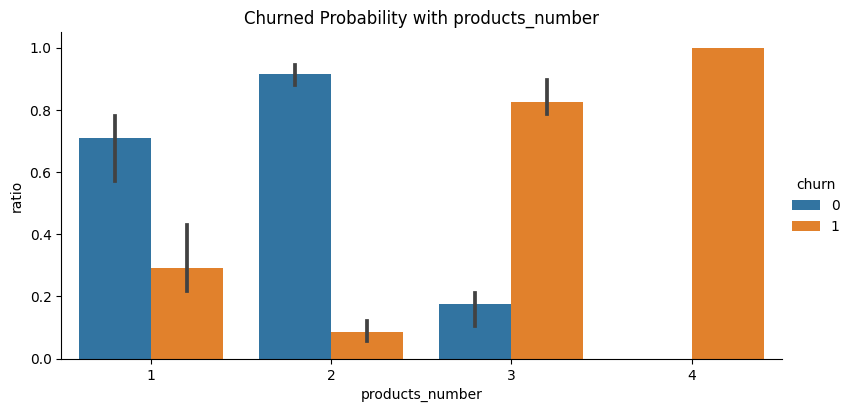

In [ ]:
#Visualizing product number vs churn

by_products_number = dummy.groupby(['products_number','country'])['churn'].value_counts(normalize=True).to_frame().rename(columns={'churn': 'ratio'}).reset_index().sort_values('products_number')

print(by_products_number)

sns.catplot(x='products_number',y='ratio', hue='churn', kind='bar', data=by_products_number,height=4,aspect=2).set(title = 'Churned Probability with products_number')


    products_number  country  cc_with_churn     ratio
0                 1   France              0  0.838902
2                 1  Germany              0  0.702001
19                4   France              0  0.448276
4                 1    Spain              0  0.849304
6                 2   France              0  0.963667
8                 2  Germany              0  0.909615
16                3    Spain              0  0.530303
10                2    Spain              0  0.952663
21                4  Germany              0  0.250000
15                3  Germany              0  0.343750
13                3   France              0  0.403846
20                4  Germany              1  0.750000
18                4   France              1  0.551724
17                3    Spain              1  0.469697
11                2    Spain              1  0.047337
12                3   France              1  0.596154
9                 2  Germany              1  0.090385
7                 2   France

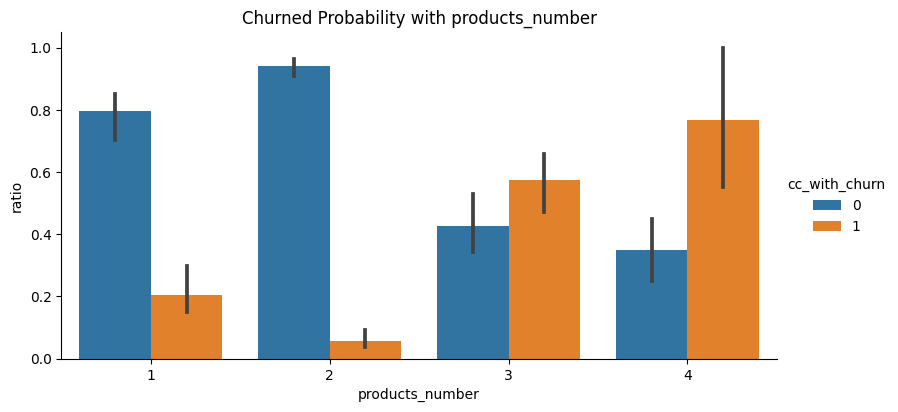

In [ ]:
#Visualizing product number vs churn who are cc holders

by_products_number_cc = dummy.groupby(['products_number','country'])['cc_with_churn'].value_counts(normalize=True).to_frame().rename(columns={'cc_with_churn': 'ratio'}).reset_index().sort_values('cc_with_churn')

print(by_products_number_cc)

sns.catplot(x='products_number',y='ratio', hue='cc_with_churn', kind='bar', data=by_products_number_cc,height=4,aspect=2).set(title = 'Churned Probability with products_number')


In [ ]:
dummy[dummy['products_number']==4].products_number.count()

60

#####Findings :

The probability of churn becomes greater as the product number grows, which means that customers with multiple services will feel uncomfortable

Even 60 people with a product number of 4 have to churn

In spain who has credit card and product number 4 has 100% churn



# Machine Learning Model Building

In [ ]:
# Splitting data into train and test

features = list(featured_data.columns)

target = "churn"

features.remove(target)


X = featured_data[features]

y = featured_data[target]


X = X.apply(pd.to_numeric, errors='coerce')

y = y.apply(pd.to_numeric, errors='coerce')


X.fillna(0, inplace = True)

y.fillna(0, inplace = True)


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3) #70% part of data is considered for training dataset and 30% part of data is considered for testing dataset


print(X_train.shape)

print(X_test.shape)

(7000, 13)
(3000, 13)


### Logistic Regression

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2390
           1       0.99      0.88      0.93       610

    accuracy                           0.97      3000
   macro avg       0.98      0.94      0.96      3000
weighted avg       0.97      0.97      0.97      3000



Text(0.5, 1.0, 'Accuracy Score: 0.9733333333333334')

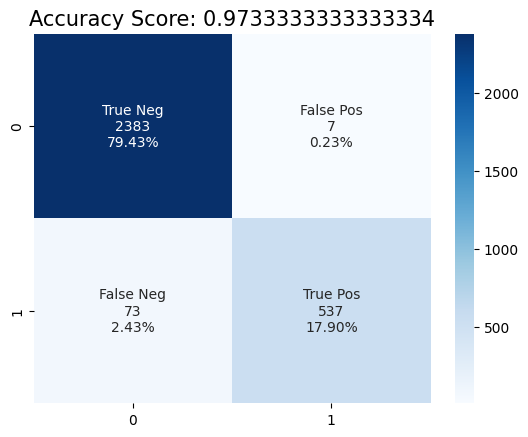

In [ ]:
# building a logistic regression model

steps = [('rescale', StandardScaler()),
         ('logr', LogisticRegression())]

modelLr = Pipeline(steps)

modelLr = modelLr.fit(X_train, y_train)

y_train_pred = modelLr.predict(X_train)

LRpred = modelLr.predict(X_test)

print(classification_report(y_test,LRpred))

cf_matrixLr = confusion_matrix(y_test,LRpred)


group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrixLr.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixLr.flatten()/np.sum(cf_matrixLr)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrixLr, annot = labels, fmt = '', cmap = 'Blues')

all_sample_title = 'Accuracy Score: {0}'.format(modelLr.score(X_test, y_test))

plt.title(all_sample_title, size = 15)


### Decision Tree

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2390
           1       0.93      0.91      0.92       610

    accuracy                           0.97      3000
   macro avg       0.96      0.95      0.95      3000
weighted avg       0.97      0.97      0.97      3000



Text(0.5, 1.0, 'Accuracy Score: 0.968')

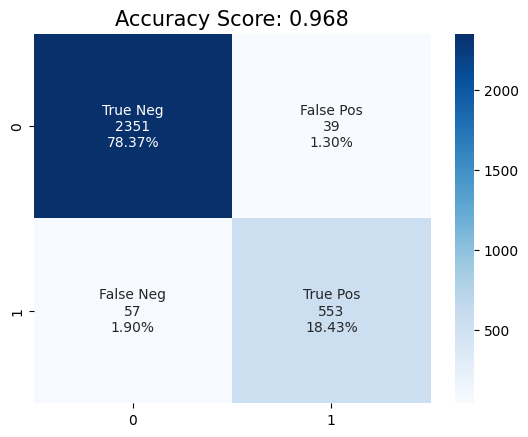

In [ ]:
steps = [('rescale', StandardScaler()),
         ('dt', DecisionTreeClassifier())]

dtree = Pipeline(steps)

dtree.fit(X_train, y_train)


y_train_pred = dtree.predict(X_train)

DTpred = dtree.predict(X_test)

print(classification_report(y_test,DTpred))

cf_matrixLr = confusion_matrix(y_test,DTpred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrixLr.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixLr.flatten()/np.sum(cf_matrixLr)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrixLr, annot = labels, fmt = '', cmap = 'Blues')

all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))

plt.title(all_sample_title, size = 15)

### Support Vector Machine (SVM)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2390
           1       0.94      0.90      0.92       610

    accuracy                           0.97      3000
   macro avg       0.96      0.94      0.95      3000
weighted avg       0.97      0.97      0.97      3000



Text(0.5, 1.0, 'Accuracy Score: 0.9673333333333334')

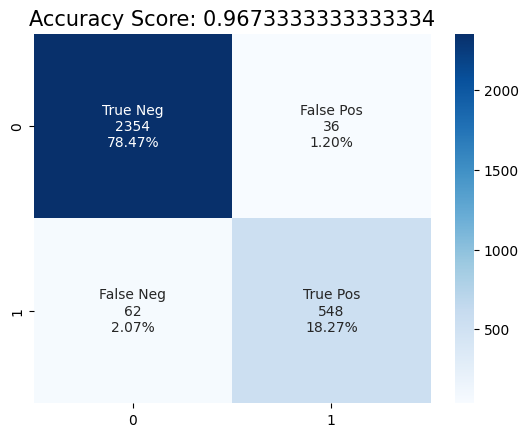

In [ ]:
#Building SVM for our dataset

steps = [('rescale', StandardScaler()),
         ('svm', DecisionTreeClassifier())]

svm = Pipeline(steps)

svm.fit(X_train, y_train)


y_train_pred = svm.predict(X_train)

SVMpred = svm.predict(X_test)

print(classification_report(y_test,SVMpred))

cf_matrixLr = confusion_matrix(y_test,SVMpred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrixLr.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixLr.flatten()/np.sum(cf_matrixLr)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrixLr, annot = labels, fmt = '', cmap = 'Blues')

all_sample_title = 'Accuracy Score: {0}'.format(svm.score(X_test, y_test))

plt.title(all_sample_title, size = 15)
